In this tutorial, we are going to look at how to use two different word embedding methods called word2vec by researchers at Google and GloVe by researchers at Stanford.

[Gensim](https://radimrehurek.com/gensim/index.html) is an open source Python library for natural language processing, with a focus on topic modeling.

**Gensim** supports an implementation of the Word2Vec word embedding for __learning new word vectors__ from text.

## Develop Word2Vec Embedding

In [42]:
from gensim.models import Word2Vec, KeyedVectors

In [94]:
# Learning a word embedding from text involves loading and
# organizing the text into sentences and providing them
# to the constructor of a new Word2Vec() instance.

sentences = ["This monument is a heritage of the cultural city center.",
             "This is my favourite city.",
             "My heritage will be hand down to my children.",
             "Culture is an umbrella term which encompasses the social behavior and norms found in human societies."]
tokens = [sentence.lower().split() for sentence in sentences]
model = Word2Vec(tokens, size = 20, window=2, min_count=1)


**size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

**window**: (default 5) The maximum distance between a target word and words around the target word.

**min_count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.

**workers**: (default 3) The number of threads to use while training.

**sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [95]:
words = list(model.wv.vocab)
print(f"Number of words in the dictionary: {len(words)}.\n")
print(words)

Number of words in the dictionary: 33.

['this', 'monument', 'is', 'a', 'heritage', 'of', 'the', 'cultural', 'city', 'center.', 'my', 'favourite', 'city.', 'will', 'be', 'hand', 'down', 'to', 'children.', 'culture', 'an', 'umbrella', 'term', 'which', 'encompasses', 'social', 'behavior', 'and', 'norms', 'found', 'in', 'human', 'societies.']


In [96]:
print(model['monument'])

[ 0.01184061 -0.01227337 -0.01467902  0.01763657 -0.0162622   0.01212533
 -0.01599702 -0.00459481  0.00994728 -0.01203475 -0.00818789 -0.00084461
 -0.00314143 -0.02127088 -0.01885963  0.01159889  0.01712228  0.02215363
 -0.02210934 -0.01711814]


/Users/john/miniconda3/envs/systems/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [97]:
model.wv.save_word2vec_format('model.bin')
model.wv.save_word2vec_format('model_non_binary.txt', binary=False)

In [98]:
new_model = KeyedVectors.load_word2vec_format('model.bin')

In [99]:
print(new_model['monument'])

[ 0.01184061 -0.01227337 -0.01467902  0.01763657 -0.0162622   0.01212533
 -0.01599702 -0.00459481  0.00994728 -0.01203475 -0.00818789 -0.00084461
 -0.00314143 -0.02127088 -0.01885963  0.01159889  0.01712228  0.02215363
 -0.02210934 -0.01711814]


## Visualize Word Embedding

In [100]:
X = model[model.wv.vocab] # list of embeddings for all the words in the vocab

/Users/john/miniconda3/envs/systems/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Plot Word Vectore Using PCA

We can then train a projection method on the vectors, such as those methods offered in scikit-learn, then use matplotlib to plot the projection as a scatter plot.

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

In [101]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [102]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [103]:
print("Vocab size: {}. PCA dimensionality: {}".format(result.shape[0], result.shape[1]))

Vocab size: 33. PCA dimensionality: 2


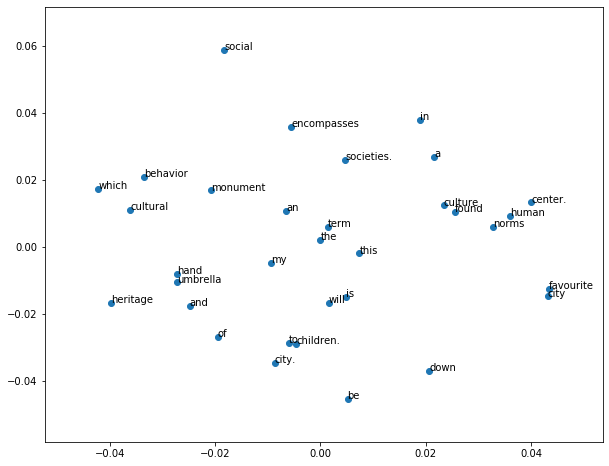

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))

In [109]:
result = model.wv.most_similar(positive=['will', 'be'], negative=['culture'], topn=1)
print(result)

[('to', 0.5583993792533875)]


## Load Google's Word2Vec Embedding

Training your own word vectors may be the best approach for a given NLP problem.

But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm.

An alternative is to simply use an existing pre-trained word embedding.

Along with the paper and code for word2vec, Google also published a pre-trained word2vec model on the [Word2Vec Google Code Project](https://code.google.com/archive/p/word2vec/).

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

It is a 1.53 Gigabytes file. You can download it from here:

GoogleNews-vectors-negative300.bin.gz
Unzipped, the binary file ([GoogleNews-vectors-negative300.bin](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)) is 3.4 Gigabytes.

The Gensim library provides tools to load this file. Specifically, you can call the KeyedVectors.load_word2vec_format() function to load this model into memory, for example:

In [ ]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [107]:
result = model.wv.most_similar(positive=['woman', 'king'],
                               negative=['man'],
                               topn=1)
print(result)

[('to', 0.5583993792533875)]


/Users/john/miniconda3/envs/systems/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


## Load Standford's GloVe Embedding

Stanford researchers also have their own word embedding algorithm like word2vec called [Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/), or GloVe for short.

I won’t get into the details of the differences between word2vec and GloVe here, but generally, NLP practitioners seem to prefer GloVe at the moment based on results.

Like word2vec, the GloVe researchers also provide pre-trained word vectors, in this case, a great selection to choose from.

You can download the GloVe pre-trained word vectors and load them easily with gensim.

The first step is to convert the GloVe file format to the word2vec file format. The only difference is the addition of a small header line. This can be done by calling the glove2word2vec() function. For example:

Once converted, the file can be loaded just like word2vec file above.

Let’s make this concrete with an example.

You can download the smallest GloVe pre-trained model from the GloVe website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

The direct download link is here: [glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip)

Working with the 100-dimensional version of the model, we can convert the file to word2vec format as follows:

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

You now have a copy of the GloVe model in word2vec format with the filename glove.6B.100d.txt.word2vec.

Now we can load it and perform the same (king – man) + woman = ? test as in the previous section. The complete code listing is provided below. Note that the converted file is ASCII format, not binary, so we set binary=False when loading.

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.wv.most_similar(positive=['woman', 'king'],
                               negative=['man'],
                               topn=1)
print(result)